In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import itertools 

In [4]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [5]:
kinds_df = pd.read_excel('D:\data\data\leader and common.xlsx')
print(kinds_df)

      Unnamed: 0                      投资机构 是否大佬
0              0                 Aurinvest    否
1              1              Domain Elite    否
2              2  Scottish Equity Partners    否
3              3                 StartupCV    否
4              4                       SRF    否
...          ...                       ...  ...
4040        7717               中大资本服务业研究中心    否
4041        7719            Vulcan Capital    否
4042        7755                     时代丰投资    否
4043        7777                      德诚资本    否
4044        7850                      坤鼎投资    否

[4045 rows x 3 columns]


In [6]:
invest_df = pd.read_excel('D:\data\data\investments_clear3(1).xlsx',index_col=0)
invest_df

,机构名称,投资时间,二级代码,二级名称,一级字母代码,一级名称
0,中科招,1991,38,电气机械和器材制造业,C,制造业
1,浙科投资,1992,67,资本市场服务,J,金融业
2,中科招,1992,27,医药制造业,C,制造业
3,晨兴集团,1993,38,电气机械和器材制造业,C,制造业
4,摩根士丹利,1993,51,批发业,F,批发和零售业
...,...,...,...,...,...,...
31724,红杉,2015,72,商务服务业,L,租赁和商务服务业
31725,数字天空技术,2015,72,商务服务业,L,租赁和商务服务业
31727,华卓投资,2015,64,互联网和相关服务,I,信息传输、软件和信息技术服务业
31728,海融投资,2015,27,医药制造业,C,制造业


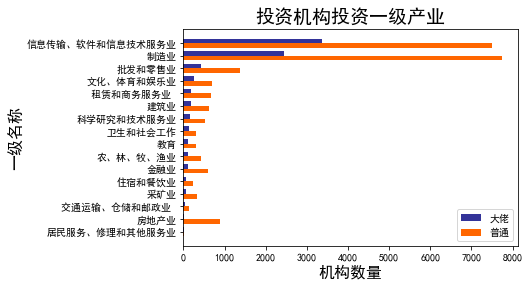

In [7]:
first_1 = {}#某个第一产业一共有多少大佬
first_2 = {}#某个第一产业一共有多少个普通
second_1 = {}
second_2 = {}
tick_1 = {}#第一产业字母对应名称
tick_2 = {}#第二产业数字对应名称
for i in invest_df.itertuples():
    invester = getattr(i,'机构名称')
    first = getattr(i,'一级字母代码')
    second = getattr(i,'二级代码')
    now = list(kinds_df.是否大佬[kinds_df.投资机构 == invester])
    tick_1[first] = getattr(i,'一级名称')
    tick_2[second] = getattr(i,'二级名称')
#    print(now)
    if list(kinds_df.是否大佬[kinds_df.投资机构 == invester])[0] == '是':
        if first not in first_1.keys():
            first_1[first] = 1.0
        else:
            first_1[first] += 1
        if second not in second_1.keys():
            second_1[second] = 1.0
        else:
            second_1[second] += 1
    else:
        if first not in first_2.keys():
            first_2[first] = 1.0
        else:
            first_2[first] += 1
        if second not in second_2.keys():
            second_2[second] = 1.0
        else:
            second_2[second] += 1
#全部一级产业
first_1 = sorted(first_1.items(),key = lambda kv:(kv[1],kv[0]))#按照value值排序
coor_y = 0.5
draw_y = []#y轴工业名称
number_y = []#需要替换的y坐标
height = 0.85#柱子宽度
for items in range(len(first_1)):
    industry = first_1[items][0]
    quantity_1 = first_1[items][1]
    quantity_2 = first_2[industry]
    if items == 0:
        plt.barh(y = coor_y + height/2,width = quantity_1,color = '#333399',height = height,label = '大佬')
        plt.barh(y = coor_y - height/2,width = quantity_2, color='#FF6600',height = height,label = '普通')
    else:
        plt.barh(y=coor_y + height / 2, width=quantity_1, color='#333399', height=height)
        plt.barh(y=coor_y - height / 2, width=quantity_2, color='#FF6600', height=height)
    draw_y.append(tick_1[industry])
    number_y.append(coor_y)
    coor_y += 2.3
plt.yticks(number_y,draw_y)
plt.xlabel('机构数量',size = 16)
plt.ylabel('一级名称',size = 16)
plt.title('投资机构投资一级产业',size = 19)
plt.legend()

In [ ]:
plt.figure(figsize= (300,800))
second_1 = sorted(second_1.items(),key = lambda kv:(kv[1],kv[0]))#按照value值排序
coor_y = 0.5
draw_y = []#y轴工业名称
number_y = []#需要替换的y坐标
height = 1#柱子宽度

for items in range(len(second_1)):
    industry = second_1[items][0]
    quantity_1 = second_1[items][1]
    plt.barh(y = coor_y,width = quantity_1,color = '#333399',height = height)
    #plt.barh(y = coor_y - height/2,width = quantity_2, color='#FF6600',height = height,label = '失败风投机构')
    draw_y.append(tick_2[industry])
    number_y.append(coor_y)
    coor_y += 2
    
plt.yticks(number_y,draw_y)
plt.xlabel('机构数量',size = 11)
plt.ylabel('二级名称',size = 11)
plt.title('elite投资机构投资二级产业',size = 14)
plt.yticks(fontsize=7)
#plt.legend(frameon=False)
plt.show()
plt.savefig('my.png')